### A1 Analytics Report / Computational Data Analytics with Python
### Author: Yoshiyuki Watabe
### Date: Feb 8th 2024

# Problem statement
The problem to be solved is to forecast the future production of similar oil wells in order to help oil and gas trading companies more effectively trade production rights for oil/gas wells in the United States. Currently, this forecasting is done by experts manually creating type curves.

# Sub-Problem statement
The main business challenge is "to accurately forecast future production of oil and gas wells to support better trading decisions". To solve this main challenge, it can be subdivided as follows. Streamlining the data collection and analysis process will support faster and more effective decision making, while improving the accuracy of production volume forecasts will directly improve profitability. In addition, through environmental impact assessment and management, companies can ensure regulatory compliance and fulfill their social responsibilities. When all of these challenges are addressed, oil and gas trading companies will be able to make better trading decisions and achieve sustainable business growth.

### Streamlining the data collection and analysis process (* covered in this assignment)
- Streamlining data collection and analysis processes enables faster decision-making and improves the ability to respond to market fluctuations. Efficient data processing is necessary to analyze large volumes of production data in a timely manner, to avoid missing business opportunities, and to maintain competitive advantage.
### Improving the accuracy of production volume forecasts (* covered in the A2 assignment)
- Improving the accuracy of production volume forecasts is essential to minimizing transaction risk and maximizing the return on investment. Accurate forecasts accurately value resources and enable more informed choices in investment decisions.
### Environmental impact assessment and management (* data analysis alone cannot solve the sub-problem)
- Oil and gas well development and production involves environmental impacts. Assessing and properly managing environmental impacts is critical to achieving sustainable development and ensuring regulatory compliance. Managing environmental risks is also necessary to fulfill corporate social responsibility and maintain public trust.

### Approach to Problem Solving
The approach in this data analysis is as follows.

- First, the data assumptions are identified. Specifically, a wide variety of data is needed for analysis, including well production data, geological characteristics, and market trends. It is also essential to check data quality. Data completeness, consistency, and accuracy are evaluated, and any problems are properly addressed. In addition, understand the scope of available data and its limitations to clearly define the scope of the analysis.

- The next step is to undertake a detailed analysis (EDA) of the data provided. This step includes a statistical overview of each column, checking for missing values and data types. We will also analyze the temporal trend of production to understand the monthly and yearly variations. In addition, we will examine in detail the relationship between productivity and geological characteristics to understand the impact of geological data on production. Similarly, we will examine the relationship between water production and oil and gas production to assess the impact of different factors on production. Finally, the productivity of wells by different operators will be compared to identify differences in performance. Detailed data analysis (EDA) is an essential step in understanding well performance and predicting future production trends.

- Finally, we summarize conclusions and insights drawn from the data and make specific recommendations for risk management and decision making, taking into account the limitations of the data. Through this approach, we aim to help oil and gas trading companies streamline their data collection and analysis processes and increase the efficiency of their trading strategies.

### Steps for Problem Solving
- Step 1: Load Dataset and Initial Check
    - Confirm data shape, column name, and data type.
    - Display the first few rows to get an overview of the data.
- Step 2: Calculation of Basic Statistics
    - Calculate basic statistics such as mean, median, minimum, maximum, etc. for each - column.
    - Visualize the distribution of variables (histograms, box plots, etc.).
- Step 3: Identification of Missing and Outlier Values
    - Calculation of the percentage of missing values for each column.
    - Identification of outlier values and possible countermeasures.
- Step 4: Correlation Analysis
    - Calculation of the percentage of missing values for each column.
    - Identification of outlier values and possible countermeasures.
- Step 5: Trend Analysis of Time-Series Data
    - Display changes in production volume by month and year on line graphs.
    - Check seasonality and trends.
- Step 6: Comparative Analysis by Group
    - Analyze production differences by well location and operator.

# Results
From this analysis, it became clear that future production forecasts need to take into account operator performance as well as production history. The time-series analysis also showed the importance of regular monitoring and rapid data updating to capture the impact of external environmental factors such as market and technology changes. These insights are intended to support more effective decision making in trading strategies and risk management.
### Basic Statistics and Variable Distributions
- Basic statistics were computed for each variable in the production data and their distributions were visualized to provide an overview of the data. In particular, it became clear that production (BOE and MCFE) was distributed over a wide range, with some wells showing particularly high productivity.
### Missing Values and Outliers
- Missing values were present in a small number of variables, but overall the data can be assessed as relatively complete. The analysis of outliers also revealed that some wells showed significantly different production than the average.
### Correlation Analysis
- High correlations were found among the production-related variables, suggesting that certain variables may be redundant in the forecasting model. This indicates that optimization of variable selection should be considered when creating the model.
### Time-series Trend Anlysis
- Monthly and annual production volumes were plotted in a time series to reveal production trends over time. In particular, the annual data shows a consistent upward trend, while a significant decrease can be observed in the final year. This may reflect the end of the data collection period or an actual decline in production.
### Group Comparison Analysis
- A box-and-whisker chart was used to visualize the differences in aggregated production by operator. This allowed us to see that certain operators were producing higher or lower volumes than expected, giving us an idea of the variability in operator performance.

# Assumptions made
The following assumptions were made in proceeding with the analysis. These assumptions were consciously made at each step of the analysis and were consistently considered from data preprocessing through model selection, feature engineering, and final decision support tool development. These Assumptions are important for understanding the data, selecting models, improving forecast accuracy, and ensuring the effectiveness of our decision support tools.
### Data Completeness and Accuracy
- The assumption is that the data underlying the analysis is complete and that the production data for each well is accurately recorded. This assumption is important because incomplete or incorrectly recorded data can significantly affect the accuracy of the forecast model.
### Production Predictability
- This is the assumption that future production can be predicted based on historical production data and well characteristics. This is based on the idea that a well's productivity is determined to some degree by its physical characteristics and past production history.

# Limitations
The results of this analysis were developed to support faster and more effective decision-making by streamlining the data collection and analysis process for oil and gas trading companies to predict future production from similar wells in order to more effectively trade production rights for oil and gas wells in the United States, and its effectiveness is dependent on the following specific conditions and limitations.
### Data Quality and Coverage
- The reliability of the analysis is highly dependent on the quality of the data used. Incomplete data, erroneous records, or biased data sets can significantly affect the accuracy of a forecast. Also, because the model is trained on historical data, it may not reflect new factors or changes that may affect well productivity in the future.

# Data
Among the data provided, "Production Data.xlsx" was converted to a csv file and used for data analysis. This data was used because it held a wide range of information needed to solve business problems as columns.

# Problem Solving
### Step 1: Load Dataset and Initial Check
The dataset production_data.csv has been read. This dataset contains production data for the wells, and the first five rows are outlined below. In total, the data contains 46 columns, recording detailed information about production, injection volumes, daily injection rates, etc.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
from pathlib import Path

In [2]:
# Data load
df = pd.read_csv(Path('data').joinpath('production_data.csv'))
df.head()

WellID  CompletionID       API_UWI                         WellName  \
0  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
1  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
2  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
3  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
4  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   

   WellboreId ProducingMonth  TotalProdMonths  TotalCompletionMonths  \
0      689466     2018/03/01                1                      1   
1      689466     2018/04/01                2                      2   
2      689466     2018/05/01                3                      3   
3      689466     2018/06/01                4                      4   
4      689466     2018/07/01                5                      5   

   ProducingDays  Prod_BOE  ...  InjectionSolvent_BBL  InjectionSteam_BBL  \
0             31         0  ...                   NaN                 NaN   
1             30      3552  ...                   NaN                 NaN   
2             31     35582  ...                   NaN                 NaN   
3             30     25530  ...                   NaN                 NaN   
4             31     20634  ...                   NaN                 NaN   

   InjectionWater_BBL  InjectionOther_BBL  \
0                 NaN                 NaN   
1                 NaN                 NaN   
2                 NaN                 NaN   
3                 NaN                 NaN   
4                 NaN                 NaN   

   CalendarDayInjectionWater_BBLPerDAY  CalendarDayInjectionSteam_BBLPerDAY  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   CalendarDayInjectionSolvent_BBLPerDAY  CalendarDayInjectionGas_MCFPerDAY  \
0                                    NaN                                NaN   
1                                    NaN                                NaN   
2                                    NaN                                NaN   
3                                    NaN                                NaN   
4                                    NaN                                NaN   

   CalendarDayInjectionOther_BBLPerDAY  ENVProdID  
0                                  NaN          1  
1                                  NaN          1  
2                                  NaN          1  
3                                  NaN          1  
4                                  NaN          1  

[5 rows x 46 columns]

In [3]:
# Removing unnecessary columns
columns_to_drop = ['WellID', 'CompletionID', 'WellboreId', 'ENVProdID',
                   'InjectionGas_MCF', 'InjectionSolvent_BBL', 'InjectionSteam_BBL',
                   'InjectionWater_BBL', 'InjectionOther_BBL',
                   'CalendarDayInjectionWater_BBLPerDAY', 'CalendarDayInjectionSteam_BBLPerDAY',
                   'CalendarDayInjectionSolvent_BBLPerDAY', 'CalendarDayInjectionGas_MCFPerDAY',
                   'CalendarDayInjectionOther_BBLPerDAY', 'RepGasProd_MCF', 'PDRepGas_MCFPerDAY', 'CumRepGas_MCF', 'CDRepGas_MCFPerDAY']
df_cleaned = df.drop(columns=columns_to_drop)

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106835 entries, 0 to 106834
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   API_UWI                   106835 non-null  object
 1   WellName                  106835 non-null  object
 2   ProducingMonth            106835 non-null  object
 3   TotalProdMonths           106835 non-null  int64 
 4   TotalCompletionMonths     106835 non-null  int64 
 5   ProducingDays             106835 non-null  int64 
 6   Prod_BOE                  106835 non-null  int64 
 7   Prod_MCFE                 106835 non-null  int64 
 8   LiquidsProd_BBL           106835 non-null  int64 
 9   GasProd_MCF               106835 non-null  int64 
 10  WaterProd_BBL             106835 non-null  int64 
 11  CDProd_BOEPerDAY          106835 non-null  int64 
 12  CDProd_MCFEPerDAY         106835 non-null  int64 
 13  CDLiquids_BBLPerDAY       106835 non-null  int64 
 14  CDGa

In [5]:
# Converting 'ProducingMonth' to datetime format
df_cleaned['ProducingMonth'] = pd.to_datetime(df_cleaned['ProducingMonth'])

In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106835 entries, 0 to 106834
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   API_UWI                   106835 non-null  object        
 1   WellName                  106835 non-null  object        
 2   ProducingMonth            106835 non-null  datetime64[ns]
 3   TotalProdMonths           106835 non-null  int64         
 4   TotalCompletionMonths     106835 non-null  int64         
 5   ProducingDays             106835 non-null  int64         
 6   Prod_BOE                  106835 non-null  int64         
 7   Prod_MCFE                 106835 non-null  int64         
 8   LiquidsProd_BBL           106835 non-null  int64         
 9   GasProd_MCF               106835 non-null  int64         
 10  WaterProd_BBL             106835 non-null  int64         
 11  CDProd_BOEPerDAY          106835 non-null  int64         
 12  CD

### Step 2: Calculation of Basic Statistics
The results of the basic statistics calculations are shown below. The mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values are calculated for each column. Histograms and box-and-whisker plots are then drawn to visualize the distribution of the variables. The histogram shows the distribution of each variable. It can be seen that the distribution of each variable is concentrated in a particular range, but it is suggested that some outliers are also present. The box-and-whisker plots visualize the median, interquartile range, and outliers for these variables.

In [7]:
# Calculating basic statistics
df_cleaned.describe()

ProducingMonth  TotalProdMonths  TotalCompletionMonths  \
count                         106835    106835.000000          106835.000000   
mean   2021-07-08 04:27:57.427809280        26.700098              26.652923   
min              2009-01-01 00:00:00         1.000000               1.000000   
25%              2020-07-01 00:00:00        11.000000              10.000000   
50%              2021-12-01 00:00:00        22.000000              22.000000   
75%              2022-11-01 00:00:00        39.000000              39.000000   
max              2023-09-01 00:00:00       175.000000             175.000000   
std                              NaN        20.156035              20.133603   

       ProducingDays       Prod_BOE     Prod_MCFE  LiquidsProd_BBL  \
count  106835.000000  106835.000000  1.068350e+05    106835.000000   
mean       28.443918   13197.204970  7.918274e+04      8793.129808   
min         0.000000       0.000000  0.000000e+00         0.000000   
25%        29.000000    4140.000000  2.483800e+04      2586.000000   
50%        30.000000    8190.000000  4.914200e+04      5214.000000   
75%        31.000000   16113.000000  9.667800e+04     10600.500000   
max        31.000000  187682.000000  1.126090e+06    130987.000000   
std         5.718093   15152.202964  9.091321e+04     10628.144210   

         GasProd_MCF  WaterProd_BBL  CDProd_BOEPerDAY  ...  PDProd_BOEPerDAY  \
count  106835.000000  106835.000000     106835.000000  ...     106835.000000   
mean    26423.958310   25247.805448        433.560659  ...        462.932503   
min         0.000000       0.000000          0.000000  ...          0.000000   
25%      7823.000000    7670.000000        136.000000  ...        145.000000   
50%     16272.000000   15371.000000        269.000000  ...        283.000000   
75%     33555.500000   31566.500000        529.000000  ...        558.000000   
max    451789.000000  506241.000000       6054.000000  ...      34179.000000   
std     30844.486072   28765.607989        497.159700  ...        571.784248   

       PDProd_MCFEPerDAY  PDLiquids_BBLPerDAY  PDGas_MCFPerDAY  \
count      106835.000000        106835.000000    106835.000000   
mean         2777.586634           308.710863       925.373277   
min             0.000000             0.000000         0.000000   
25%           868.000000            90.000000       273.000000   
50%          1699.000000           180.000000       564.000000   
75%          3348.000000           368.000000      1160.000000   
max        205074.000000         25237.000000     60580.000000   
std          3430.713089           397.021639      1188.706306   

       PDWater_BBLPerDAY   CumProd_BOE  CumProd_MCFE  CumLiquids_BBL  \
count      106835.000000  1.068350e+05  1.068350e+05    1.068350e+05   
mean          896.751935  3.838096e+05  2.302857e+06    2.643453e+05   
min             0.000000  0.000000e+00  0.000000e+00    0.000000e+00   
25%           266.000000  2.239130e+05  1.343478e+06    1.548280e+05   
50%           531.000000  3.548340e+05  2.129004e+06    2.435520e+05   
75%          1100.000000  5.134045e+05  3.080428e+06    3.508435e+05   
max         60762.000000  1.897537e+06  1.138522e+07    1.426574e+06   
std          1122.119395  2.196748e+05  1.318049e+06    1.527824e+05   

         CumGas_MCF  CumWater_BBL  
count  1.068350e+05  1.068350e+05  
mean   7.167853e+05  7.207137e+05  
min    0.000000e+00  0.000000e+00  
25%    3.593685e+05  3.662910e+05  
50%    6.209290e+05  6.163830e+05  
75%    9.652770e+05  9.741145e+05  
max    4.612588e+06  4.291206e+06  
std    4.885252e+05  4.861744e+05  

[8 rows x 24 columns]

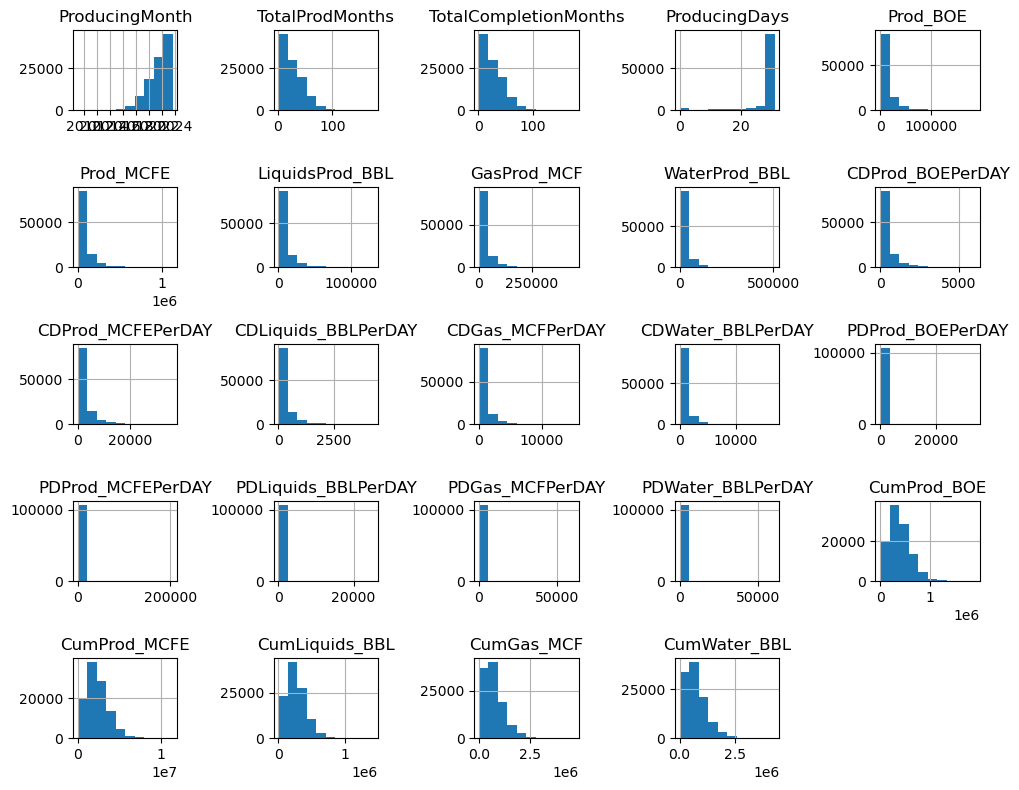

In [8]:
# Displaying histograms
df_cleaned.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

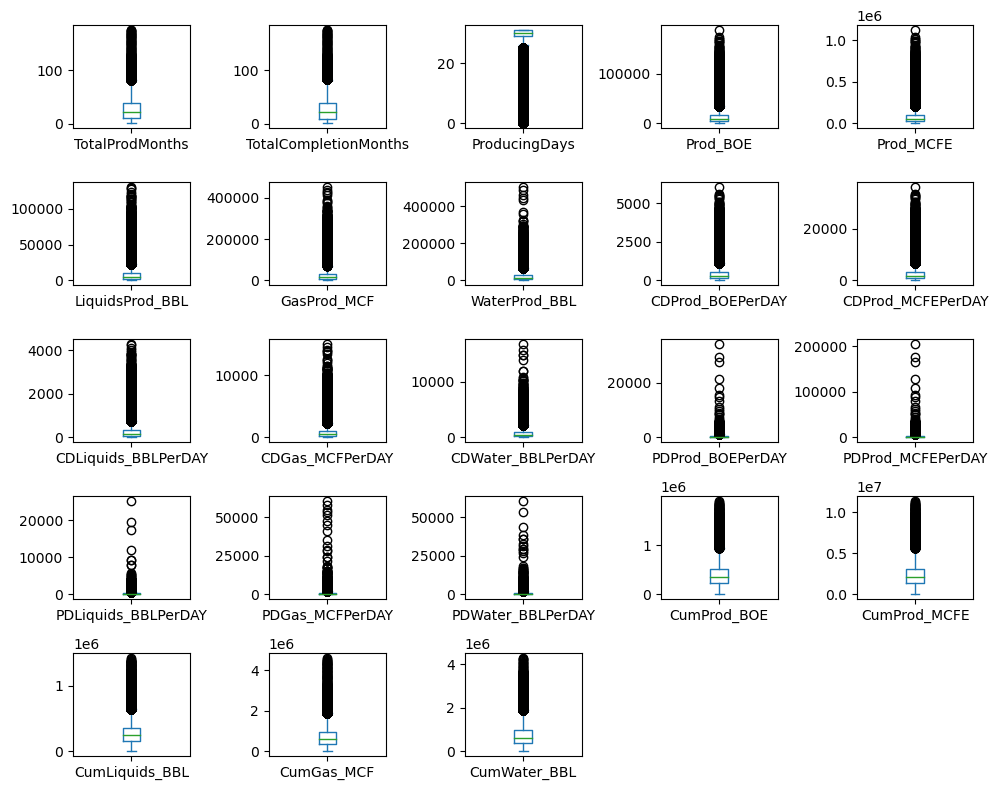

In [9]:
# Displaying box plots
df_cleaned.plot(kind='box', subplots=True, layout=(5,5), figsize=(10, 8))
plt.tight_layout()
plt.show()

### Step 3: Identification of Missing and Outlier Values
The following analysis was performed for missing and abnormal values. First, the number of missing and abnormal values in each column of the data frame was determined, and then the number of missing and abnormal values was divided by the number of rows in the data frame to calculate the percentage, and the results were displayed in percentage format. The missing values were found only for the Producing Operator, but the percentage was only 1.29% of the total, so we decided to leave it as it was. On the other hand, outliers were found in all columns, the largest being ProducingDays, which accounted for 11.52% of the total. Since these values are not small but not too large, we decided not to exclude them or replace them and keep the values as it is.

In [10]:
# Checking for missing values in each column of the cleaned dataframe
missing_values = df_cleaned.isnull().sum()

# Displaying the number of missing values per column
missing_values

API_UWI                        0
WellName                       0
ProducingMonth                 0
TotalProdMonths                0
TotalCompletionMonths          0
ProducingDays                  0
Prod_BOE                       0
Prod_MCFE                      0
LiquidsProd_BBL                0
GasProd_MCF                    0
WaterProd_BBL                  0
CDProd_BOEPerDAY               0
CDProd_MCFEPerDAY              0
CDLiquids_BBLPerDAY            0
CDGas_MCFPerDAY                0
CDWater_BBLPerDAY              0
PDProd_BOEPerDAY               0
PDProd_MCFEPerDAY              0
PDLiquids_BBLPerDAY            0
PDGas_MCFPerDAY                0
PDWater_BBLPerDAY              0
CumProd_BOE                    0
CumProd_MCFE                   0
CumLiquids_BBL                 0
CumGas_MCF                     0
CumWater_BBL                   0
ProductionReportedMethod       0
ProducingOperator           1383
dtype: int64

In [11]:
# Calcurate the ratio of missing values
missing_values_ratio = missing_values / len(df_cleaned) * 100
print(missing_values_ratio)

API_UWI                     0.00000
WellName                    0.00000
ProducingMonth              0.00000
TotalProdMonths             0.00000
TotalCompletionMonths       0.00000
ProducingDays               0.00000
Prod_BOE                    0.00000
Prod_MCFE                   0.00000
LiquidsProd_BBL             0.00000
GasProd_MCF                 0.00000
WaterProd_BBL               0.00000
CDProd_BOEPerDAY            0.00000
CDProd_MCFEPerDAY           0.00000
CDLiquids_BBLPerDAY         0.00000
CDGas_MCFPerDAY             0.00000
CDWater_BBLPerDAY           0.00000
PDProd_BOEPerDAY            0.00000
PDProd_MCFEPerDAY           0.00000
PDLiquids_BBLPerDAY         0.00000
PDGas_MCFPerDAY             0.00000
PDWater_BBLPerDAY           0.00000
CumProd_BOE                 0.00000
CumProd_MCFE                0.00000
CumLiquids_BBL              0.00000
CumGas_MCF                  0.00000
CumWater_BBL                0.00000
ProductionReportedMethod    0.00000
ProducingOperator           

In [12]:
# Extracting only numerical data
numeric_df = df_cleaned.select_dtypes(include=[np.number])

In [13]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106835 entries, 0 to 106834
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   TotalProdMonths        106835 non-null  int64
 1   TotalCompletionMonths  106835 non-null  int64
 2   ProducingDays          106835 non-null  int64
 3   Prod_BOE               106835 non-null  int64
 4   Prod_MCFE              106835 non-null  int64
 5   LiquidsProd_BBL        106835 non-null  int64
 6   GasProd_MCF            106835 non-null  int64
 7   WaterProd_BBL          106835 non-null  int64
 8   CDProd_BOEPerDAY       106835 non-null  int64
 9   CDProd_MCFEPerDAY      106835 non-null  int64
 10  CDLiquids_BBLPerDAY    106835 non-null  int64
 11  CDGas_MCFPerDAY        106835 non-null  int64
 12  CDWater_BBLPerDAY      106835 non-null  int64
 13  PDProd_BOEPerDAY       106835 non-null  int64
 14  PDProd_MCFEPerDAY      106835 non-null  int64
 15  PDLiquids_BBLPerD

In [14]:
# Calculate the first quartile (Q1)
Q1 = numeric_df.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = numeric_df.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the condition for identifying outliers
outliers_condition = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Count the number of outliers
outliers_count = outliers_condition.sum()

# Print the count of outliers
print(outliers_count)

TotalProdMonths           1492
TotalCompletionMonths     1352
ProducingDays            12303
Prod_BOE                  8559
Prod_MCFE                 8558
LiquidsProd_BBL           9085
GasProd_MCF               7527
WaterProd_BBL             8352
CDProd_BOEPerDAY          8560
CDProd_MCFEPerDAY         8560
CDLiquids_BBLPerDAY       9093
CDGas_MCFPerDAY           7526
CDWater_BBLPerDAY         8364
PDProd_BOEPerDAY          8836
PDProd_MCFEPerDAY         8828
PDLiquids_BBLPerDAY       9235
PDGas_MCFPerDAY           7696
PDWater_BBLPerDAY         8694
CumProd_BOE               1738
CumProd_MCFE              1738
CumLiquids_BBL            2043
CumGas_MCF                3209
CumWater_BBL              2971
dtype: int64


In [15]:
# Calcurate the ratio of outliers values
outliers_values_ratio = outliers_count / len(numeric_df) * 100
print(outliers_values_ratio)

TotalProdMonths           1.396546
TotalCompletionMonths     1.265503
ProducingDays            11.515889
Prod_BOE                  8.011419
Prod_MCFE                 8.010483
LiquidsProd_BBL           8.503767
GasProd_MCF               7.045444
WaterProd_BBL             7.817663
CDProd_BOEPerDAY          8.012356
CDProd_MCFEPerDAY         8.012356
CDLiquids_BBLPerDAY       8.511256
CDGas_MCFPerDAY           7.044508
CDWater_BBLPerDAY         7.828895
PDProd_BOEPerDAY          8.270698
PDProd_MCFEPerDAY         8.263210
PDLiquids_BBLPerDAY       8.644171
PDGas_MCFPerDAY           7.203632
PDWater_BBLPerDAY         8.137783
CumProd_BOE               1.626808
CumProd_MCFE              1.626808
CumLiquids_BBL            1.912295
CumGas_MCF                3.003697
CumWater_BBL              2.780924
dtype: float64


### Step 4: Correlation Analysis
The results of the correlation analysis are summarized below. A heat map was also created to visualize the correlations between the various numerical features in the data set. This visualization shows pairs of variables with particularly high correlations in red. The results suggest that there is some redundancy in the data set and that multiple variables may be providing the same information. There were also strong correlations between variables related to production, such as 'Prod_MCFE' and 'LiquidsProd_BBL'.

In [16]:
# Repeating the process with proper import
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                       TotalProdMonths  TotalCompletionMonths  ProducingDays  \
TotalProdMonths               1.000000               0.997067      -0.034344   
TotalCompletionMonths         0.997067               1.000000      -0.034768   
ProducingDays                -0.034344              -0.034768       1.000000   
Prod_BOE                     -0.553417              -0.553571       0.154921   
Prod_MCFE                    -0.553417              -0.553571       0.154921   
LiquidsProd_BBL              -0.548097              -0.548126       0.143966   
GasProd_MCF                  -0.498028              -0.498420       0.158984   
WaterProd_BBL                -0.509530              -0.509054       0.131968   
CDProd_BOEPerDAY             -0.554036              -0.554189       0.151636   
CDProd_MCFEPerDAY            -0.554037              -0.554189       0.151630   
CDLiquids_BBLPerDAY          -0.548704              -0.548733       0.140807   
CDGas_MCFPerDAY              -0.498516  

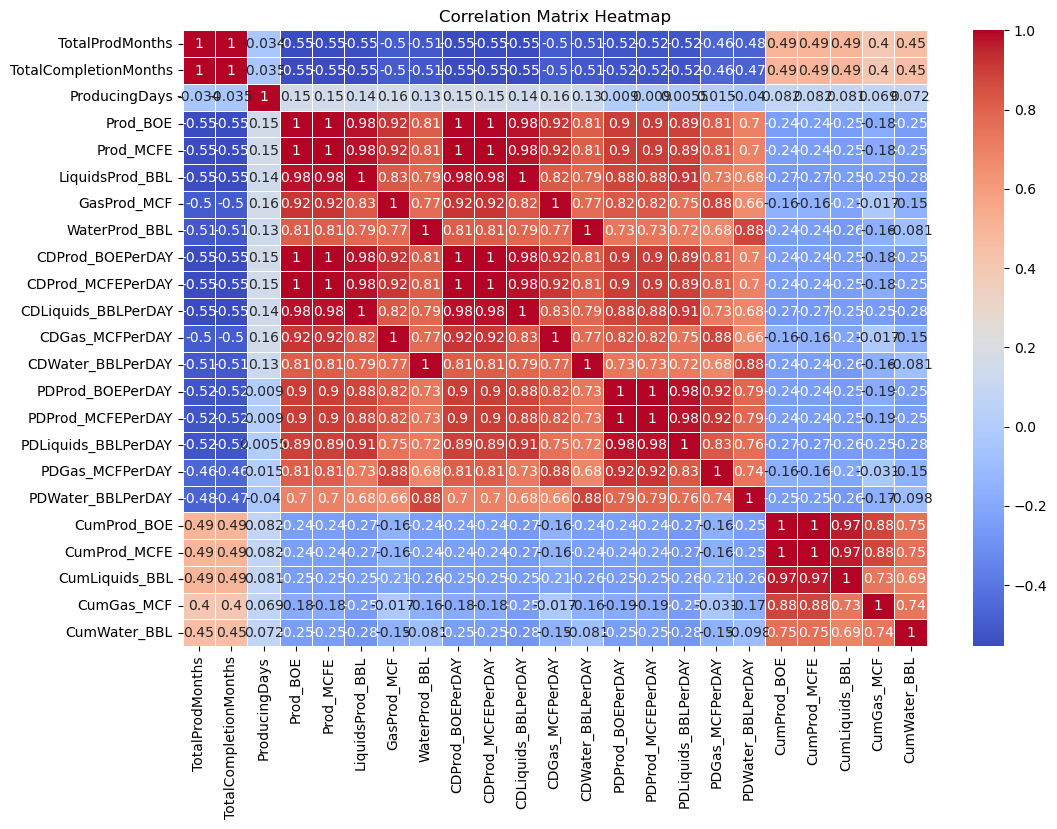

In [17]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
# Set the threshold
threshold = 0.9  # Set as an example threshold of 0.9

# Copy and sort the correlation matrix
correlation_matrix_sorted = correlation_matrix.copy().stack().sort_values(ascending=False)

# Display combinations with high correlation coefficients
for idx, correlation in correlation_matrix_sorted.items():
    if correlation > threshold and correlation != 1.0:
        col1, col2 = idx
        print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

Correlation between CumProd_MCFE and CumProd_BOE: 1.00
Correlation between CumProd_BOE and CumProd_MCFE: 1.00
Correlation between Prod_MCFE and Prod_BOE: 1.00
Correlation between Prod_BOE and Prod_MCFE: 1.00
Correlation between PDProd_MCFEPerDAY and PDProd_BOEPerDAY: 1.00
Correlation between PDProd_BOEPerDAY and PDProd_MCFEPerDAY: 1.00
Correlation between CDProd_BOEPerDAY and CDProd_MCFEPerDAY: 1.00
Correlation between CDProd_MCFEPerDAY and CDProd_BOEPerDAY: 1.00
Correlation between LiquidsProd_BBL and CDLiquids_BBLPerDAY: 1.00
Correlation between CDLiquids_BBLPerDAY and LiquidsProd_BBL: 1.00
Correlation between GasProd_MCF and CDGas_MCFPerDAY: 1.00
Correlation between CDGas_MCFPerDAY and GasProd_MCF: 1.00
Correlation between Prod_BOE and CDProd_MCFEPerDAY: 1.00
Correlation between CDProd_MCFEPerDAY and Prod_BOE: 1.00
Correlation between CDProd_MCFEPerDAY and Prod_MCFE: 1.00
Correlation between Prod_MCFE and CDProd_MCFEPerDAY: 1.00
Correlation between CDProd_BOEPerDAY and Prod_BOE: 1.0

### Step 5: Trend Analysis of Time-Series Data
For the trend analysis of the time-series data, we focused on Prod_BOE (monthly crude oil equivalent barrel production) and Prod_MCFE (monthly gas equivalent cubic foot production) and displayed their respective monthly and annual production volumes as line graphs. These variables were chosen to provide a comprehensive understanding of production volumes. Crude oil and gas production are often integrated into equivalent units, which is an important metric for assessing overall production efficiency. It is clear from the graphs that production has increased over time, and annual graphs are particularly useful for capturing long-term trends and seasonality. However, there is a significant drop in production in the last year, which may be due to the data collection period ending in the middle of that year, or it may reflect an actual decline in production. This analysis provides important insights for future production forecasting and resource management strategy development.

In [19]:
# Setting 'ProducingMonth' as the index of df_cleaned
df_cleaned.set_index('ProducingMonth', inplace=True)

# Resampling the data by month and calculating total production volume
boe_monthly_production = df_cleaned['Prod_BOE'].resample('M').sum()

# Resampling the data by year and calculating total production volume
boe_annual_production = df_cleaned['Prod_BOE'].resample('A').sum()

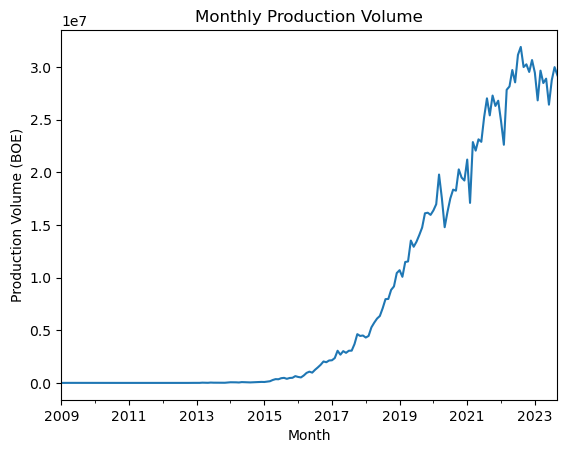

In [20]:
# Plotting the monthly production over time
boe_monthly_production.plot(title='Monthly Production Volume')
plt.xlabel('Month')
plt.ylabel('Production Volume (BOE)')
plt.show()

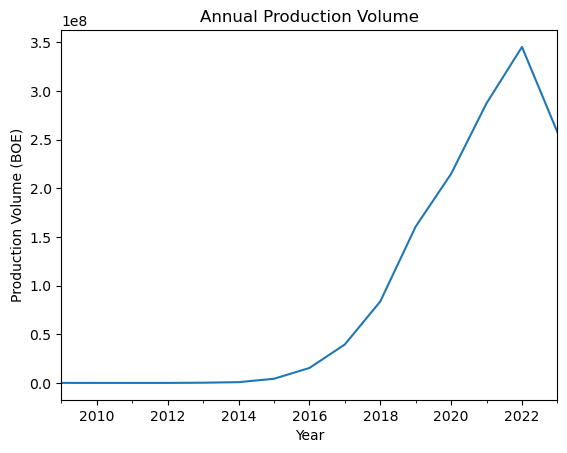

In [21]:
# Plotting the annual production over time
boe_annual_production.plot(title='Annual Production Volume')
plt.xlabel('Year')
plt.ylabel('Production Volume (BOE)')
plt.show()

In [22]:
# Resampling the data by month and calculating total production volume
mcfe_monthly_production = df_cleaned['Prod_MCFE'].resample('M').sum()

# Resampling the data by year and calculating total production volume
mcfe_annual_production = df_cleaned['Prod_MCFE'].resample('A').sum()

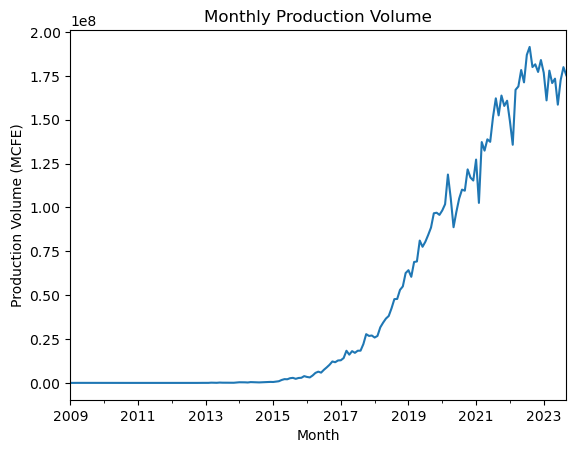

In [23]:
# Plotting the monthly production over time
mcfe_monthly_production.plot(title='Monthly Production Volume')
plt.xlabel('Month')
plt.ylabel('Production Volume (MCFE)')
plt.show()

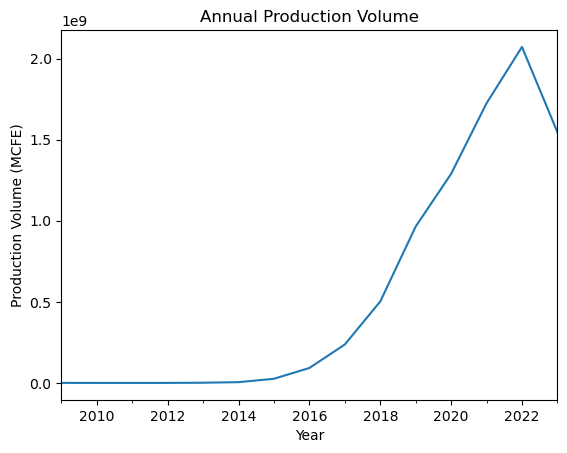

In [24]:
# Plotting the annual production over time
mcfe_annual_production.plot(title='Annual Production Volume')
plt.xlabel('Year')
plt.ylabel('Production Volume (MCFE)')
plt.show()

### Step 6: Comparative Analysis by Group
In this step, production data was aggregated based on well name and operator (operator), and the differences in production by operator were visualized in a box-and-whisker diagram. This analysis revealed variations in production among operators, with some operators having higher or lower production than others. This information helps to understand how certain operators are performing in the production process. It is also useful in comparing the productivity of wells operated by different operators. This analysis can provide insight into improving production efficiency and identifying optimal production practices by specific operators.

In [25]:
# Aggregate production volume by well location and operator
grouped_data = df_cleaned.groupby(['WellName', 'ProducingOperator'])['Prod_BOE'].sum().reset_index()

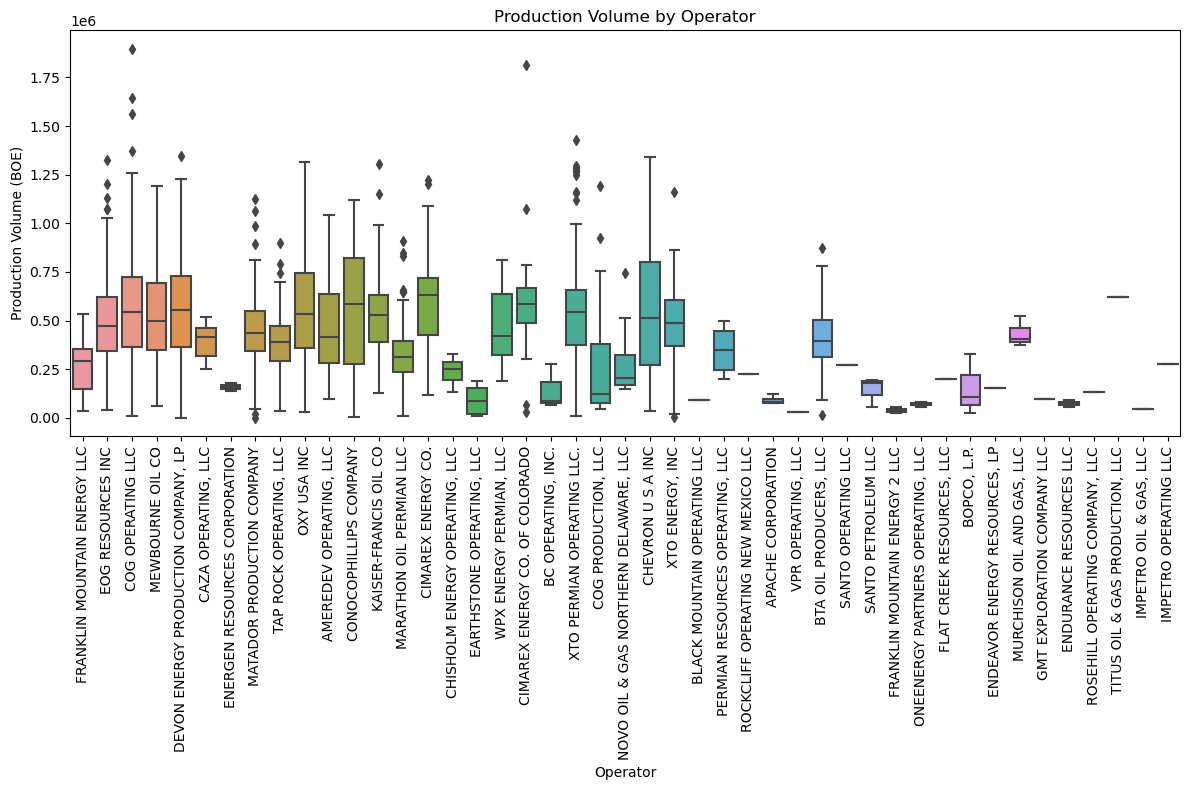

In [26]:
# Visualize the differences in production volume by operator
plt.figure(figsize=(12, 8))
sns.boxplot(data=grouped_data, x='ProducingOperator', y='Prod_BOE')
plt.title('Production Volume by Operator')
plt.xlabel('Operator')
plt.ylabel('Production Volume (BOE)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
# Aggregate production volume by well location and operator
grouped_data2 = df_cleaned.groupby(['WellName', 'ProducingOperator'])['Prod_MCFE'].sum().reset_index()

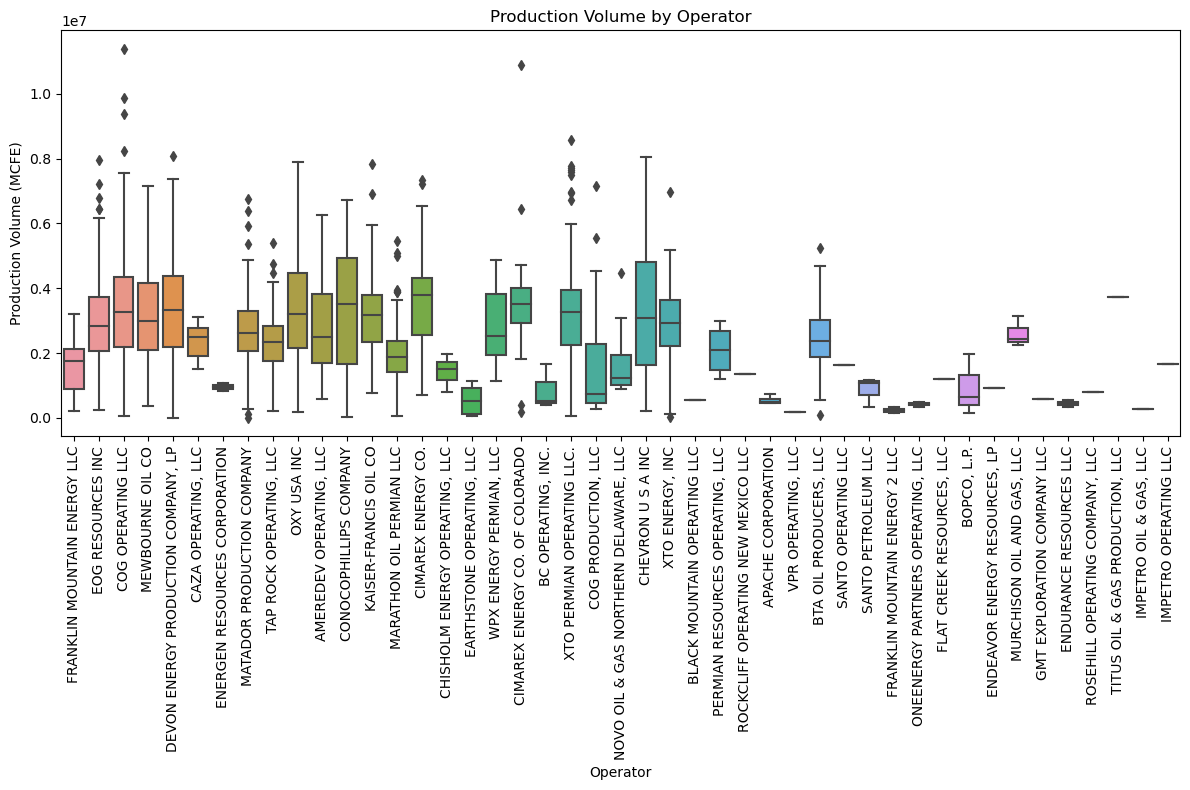

In [28]:
# Visualize the differences in production volume by operator
plt.figure(figsize=(12, 8))
sns.boxplot(data=grouped_data2, x='ProducingOperator', y='Prod_MCFE')
plt.title('Production Volume by Operator')
plt.xlabel('Operator')
plt.ylabel('Production Volume (MCFE)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Appendix (pre-work: quick examination and preparation for A2 assignment)
### Step 7: Feature Engineering
This step involves developing new features that can improve the model's ability to predict future production. Feature selection is based on the understanding that a well's characteristics and its production history can provide insight into future performance.
#### Cumulative Production Features
- Rationale: Cumulative production to date (oil, gas, water) is a strong indicator of well performance and future productivity. The higher the cumulative production, the more productive the well is likely to be.
- Selected columns: CumProd_BOE, CumGas_MCF, CumLiquids_BBL, CumWater_BBL.
#### Production Efficiency Features
- Rationale: Efficiency indicators such as production/day (oil, gas, water) highlight wells that maintain high productivity through time and may suggest more efficient reservoir extraction.
- Selected columns: BOEPerDay, GasPerDay, LiquidsPerDay, WaterPerDay, which are calculated by dividing cumulative production by total production days.
#### Production Ratio Features
- Rationale: Oil and gas production ratios can indicate the type of well (oil or gas dominant) and its variation over time. This can be important in predicting future production based on historical trends.
- New feature: OilGasRatio, which is calculated as the ratio of CumLiquids_BBL divided by CumGas_MCF.

In [29]:
# Calculate new efficiency features
df_cleaned['BOEPerDay'] = df_cleaned['CumProd_BOE'] / (df_cleaned['TotalProdMonths'] * 30)  # Approximating months to 30 days
df_cleaned['GasPerDay'] = df_cleaned['CumGas_MCF'] / (df_cleaned['TotalProdMonths'] * 30)
df_cleaned['LiquidsPerDay'] = df_cleaned['CumLiquids_BBL'] / (df_cleaned['TotalProdMonths'] * 30)
df_cleaned['WaterPerDay'] = df_cleaned['CumWater_BBL'] / (df_cleaned['TotalProdMonths'] * 30)

In [30]:
# Calculate production ratio feature
df_cleaned['OilGasRatio'] = df_cleaned['CumLiquids_BBL'] / df_cleaned['CumGas_MCF']

In [31]:
# Handle any potential division by zero or infinite values by replacing them with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

In [32]:
# Quick overview of the new features
df_cleaned[['BOEPerDay', 'GasPerDay', 'LiquidsPerDay', 'WaterPerDay', 'OilGasRatio']].head()

BOEPerDay   GasPerDay  LiquidsPerDay  WaterPerDay  \
ProducingMonth                                                       
2018-03-01        0.000000    0.000000       0.000000     7.133333   
2018-04-01       59.200000  131.800000      37.233333   551.500000   
2018-05-01      434.822222  694.255556     319.111111  1593.411111   
2018-06-01      538.858333  841.116667     398.675000  1718.675000   
2018-07-01      568.646667  869.766667     423.686667  1700.600000   

                OilGasRatio  
ProducingMonth               
2018-03-01              NaN  
2018-04-01         0.282499  
2018-05-01         0.459645  
2018-06-01         0.473983  
2018-07-01         0.487127

### Step 8: Model Selection and Development
To predict future production from oil and gas wells, the goal is to select models that can effectively capture the complex relationships between various characteristics and target variables (future production). Selection criteria include the ability of the model to handle nonlinear relationships, performance on historical data, and interpretability.
#### Rationale for Model Selection
- Random Forest Regression: This model was selected because of its ability to handle nonlinearities and interactions among features without explicit feature scaling or transformation. Random forests are robust to outliers and can model complex relationships through an ensemble of decision trees, making it suitable for data sets with a variety of well characteristics.
- Selected Features: newly created features (BOEPerDay, GasPerDay, LiquidsPerDay, WaterPerDay, OilGasRatio) and other relevant well characteristics (TotalProdMonths, ProducingDays) as predictors Used. These features are expected to influence future production by providing insight into historical production efficiencies and reservoir characteristics.
#### Development Steps
- Feature and Target Definition: Define the set of features to use for training the model and specify the target variable.
- Data Splitting: Split the data into training and testing sets to evaluate the model's performance.
- Model Training: Train the Random Forest Regressor on the training data.
- Model Evaluation: Evaluate the model on the testing set using appropriate metrics (e.g., R^2 score, Mean Absolute Error).

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [34]:
# Defining features and target variable
features = ['TotalProdMonths', 'ProducingDays', 'BOEPerDay', 'GasPerDay', 'LiquidsPerDay', 'WaterPerDay', 'OilGasRatio']
target = 'Prod_BOE'  # Assuming we aim to predict future BOE production

In [35]:
# Preparing the data
X = df_cleaned[features].fillna(0)  # Handling any NaN values
y = df_cleaned[target]

In [36]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Model evaluation
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [39]:
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 2532.0130233537698
R^2 Score: 0.896965646564977


### Step 9: Model Evaluation and Validation
After developing a forecasting model, it is important to evaluate its performance to ensure that it makes accurate forecasts. Model evaluation involves using specific metrics to assess how the model's predictions match the actual data.
#### Evaluation Rationale
- Mean Absolute Error (MAE): This indicator measures the average magnitude of the error in a set of forecasts, without considering its direction.
- Coefficient of determination (R²): This indicator provides a measure of how well the observed results are reproduced by the model, based on the percentage of total variation in the results explained by the model.
#### Validation Rationale
- Using a test set that the model has not seen during training is crucial for validation. It helps to assess the model's performance in real-world scenarios and ensures that our model can generalize well to new, unseen data.
#### Selected Columns for Evaluation
- The same features (TotalProdMonths, ProducingDays, BOEPerDay, GasPerDay, LiquidsPerDay, WaterPerDay, OilGasRatio) used for training the model are essential for evaluation and validation, as they are the basis for the model's predictions.

In [40]:
# Additional Evaluation with Cross-Validation
from sklearn.model_selection import cross_val_score

In [41]:
# Perform cross-validation for a more robust assessment
cv_mae = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

In [42]:
# This approach provides a more robust validation of the model's performance across different subsets of the data,
# offering insights into how well the model might perform in general, rather than on a specific test set.
print(f"Cross-Validated Mean Absolute Error: {cv_mae}")
print(f"Cross-Validated R^2 Score: {cv_r2}")

Cross-Validated Mean Absolute Error: 2770.610447886929
Cross-Validated R^2 Score: 0.8838271397224645


### Step 10: Generation and Interpretation of Type Curves
Type curves are an important tool in the oil and gas industry and are used to estimate future production and understand well performance over time. To generate the type curves, a predictive model developed through this analysis is used to forecast future production based on historical data and trends.
#### Generation Rationale
- Application of the predictive model: the random forest model developed in the previous step can be used to predict the future production of different wells. The model incorporates a variety of features that reflect well characteristics and historical production, allowing for customized forecasts that can inform the type curves.
- Feature quantities selected for forecasting: the same feature quantities identified as influential during the model training phase (TotalProdMonths, ProducingDays, BOEPerDay, GasPerDay, LiquidsPerDay, WaterPerDay, OilGasRatio ). These features capture both well operational history and production efficiency.

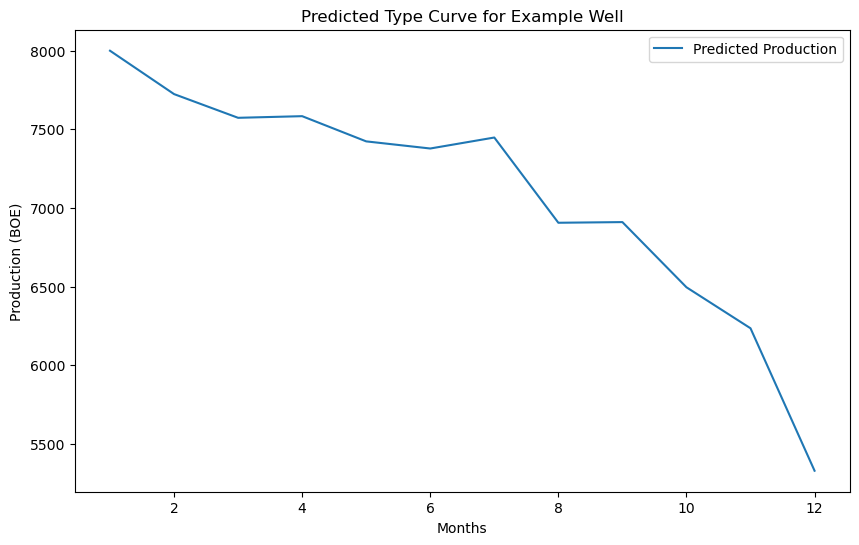

In [43]:
# Example: Generating a type curve for a single well
# Note: This is a simplified example. In practice, you would generate predictions for multiple future time points.

# Selecting a well to generate a type curve for
example_well_features = X_test.iloc[0:1, :]  # Assume we're using the first well in our test set

# Predicting future production for the next 12 months (as an example)
future_months = list(range(1, 13))
future_production = []

for month in future_months:
    # Update the `TotalProdMonths` for the prediction
    updated_features = example_well_features.copy()
    updated_features['TotalProdMonths'] += month
    # Predict the production for the updated month
    predicted_production = model.predict(updated_features)
    future_production.append(predicted_production[0])

# Plotting the type curve
plt.figure(figsize=(10, 6))
plt.plot(future_months, future_production, label='Predicted Production')
plt.xlabel('Months')
plt.ylabel('Production (BOE)')
plt.title('Predicted Type Curve for Example Well')
plt.legend()
plt.show()

### Step 11: Development of Decision Support Tool
This final step focuses on developing tools to help decision makers in the oil and gas industry evaluate and select oil wells based on future production potential. 
#### Feature selection for the tool
- TotalProdMonths, ProducingDays, BOEPerDay, GasPerDay, LiquidsPerDay, WaterPerDay, OilGasRatio, etc., with features that provide insight into well performance, Select predicted future production (Prod_BOE). These features and forecasts provide a comprehensive overview of each well's current and expected performance.
#### Predictive Model Integration
- By incorporating the random forest model developed in the previous step, the dashboard can display future production estimates based on selected well characteristics.

In [44]:
import plotly.graph_objects as go

In [45]:
# Function to generate a type curve for a given well
def generate_type_curve(well_index):
    # Selecting the well features
    well_features = X_test.iloc[well_index:well_index+1, :]
    
    # Generating predictions for the next 12 months
    future_months = list(range(1, 13))
    future_production = []
    for month in future_months:
        updated_features = well_features.copy()
        updated_features['TotalProdMonths'] += month
        predicted_production = model.predict(updated_features)
        future_production.append(predicted_production[0])
    
    # Creating the plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=future_months, y=future_production,
                             mode='lines+markers',
                             name=f'Well {well_index}'))
    fig.update_layout(title=f'Type Curve for Well {well_index}',
                      xaxis_title='Months',
                      yaxis_title='Predicted Production (BOE)',
                      template='plotly_dark')
    fig.show()

In [46]:
# Example: Generate a type curve for the first well in the test set
generate_type_curve(0)